## VISUALIZAÇÃO DA COMPOSIÇÃO DOS GASES

O objetivo desse notebook é visualizar:
* Anos com dados nulos
* O comportamento da tag ao longo do tempo
* Distribuição estatística e boxplot

Requisitos para rodar esse notebook:
* É necessário rodar '1_preprocessamento'/'0.1_analise_tags_recebidas'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%run ..\..\..\funcoes_base_global\funcoes_plot.py

In [2]:
input_path  = os.path.join('..','1_preprocessamento','out','')
output_path = os.path.join('out','')
if not os.path.exists(output_path): 
    os.mkdir(output_path)

In [3]:
tags_gas =   {'302B':['AI25121.PV','AI25131.PV','AI25141.PV','AI25151.PV','AI25161.PV','AI25171.PV','AI25181.PV','AI25191.PV','AI25211.PV'],
                '302A':['AI25121.PV','AI25131.PV','AI25141.PV','AI25151.PV','AI25161.PV','AI25171.PV','AI25181.PV','AI25191.PV','AI25211.PV'],
                '301B':[],
                '301A':[]}

In [4]:
df = pd.read_csv(input_path+'df_gas.csv.gz', compression = 'gzip')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

,AI23212.PV,AI23212.PV_quality,AI23422.PV,AI23422.PV_quality,AI23432.PV,AI23432.PV_quality,AI23442.PV,AI23442.PV_quality,AI23452.PV,AI23452.PV_quality,...,AI25161.PV,AI25161.PV_quality,AI25171.PV,AI25171.PV_quality,AI25181.PV,AI25181.PV_quality,AI25191.PV,AI25191.PV_quality,AI25211.PV,AI25211.PV_quality
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,0.0,Good,5.034,Good,4.25,Good,0.082,Good,84.379,Good,...,0.22,Good,0.001,Good,0.26,Good,0.0,Good,1.178,Good
2009-01-01 00:01:00,0.0,Good,5.034,Good,4.25,Good,0.082,Good,84.379,Good,...,0.22,Good,0.001,Good,0.26,Good,0.0,Good,1.178,Good
2009-01-01 00:02:00,0.0,Good,5.034,Good,4.25,Good,0.082,Good,84.379,Good,...,0.22,Good,0.001,Good,0.26,Good,0.0,Good,1.178,Good
2009-01-01 00:03:00,0.0,Good,5.034,Good,4.25,Good,0.082,Good,84.379,Good,...,0.22,Good,0.001,Good,0.26,Good,0.0,Good,1.178,Good
2009-01-01 00:04:00,0.0,Good,5.034,Good,4.25,Good,0.082,Good,84.379,Good,...,0.22,Good,0.001,Good,0.26,Good,0.0,Good,1.178,Good


### 1. Visualização de Dados Nulos

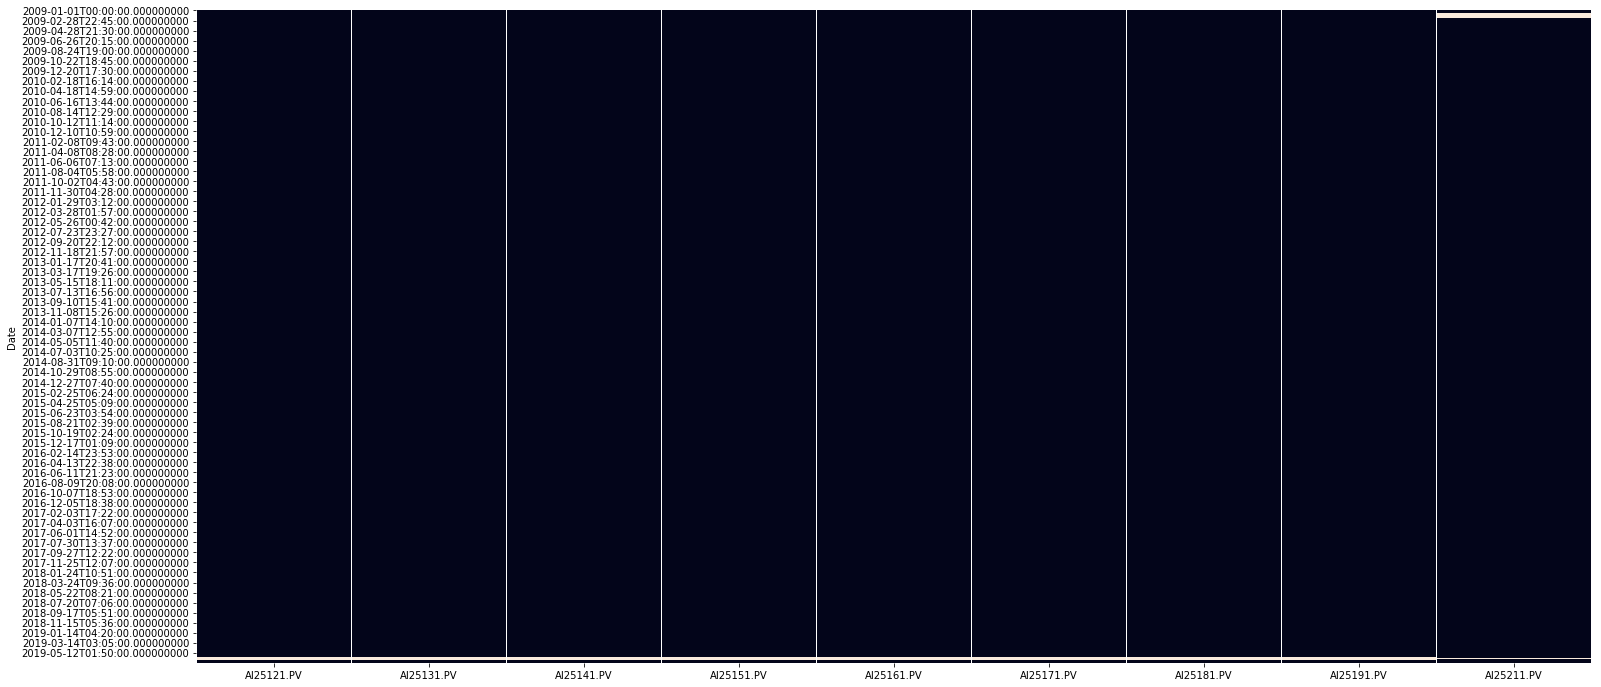

In [5]:
plt.figure(figsize = [25,12])
sns.heatmap(df[tags_gas['302A']].isnull(), cbar = False)

### 2. Visualização Temporal

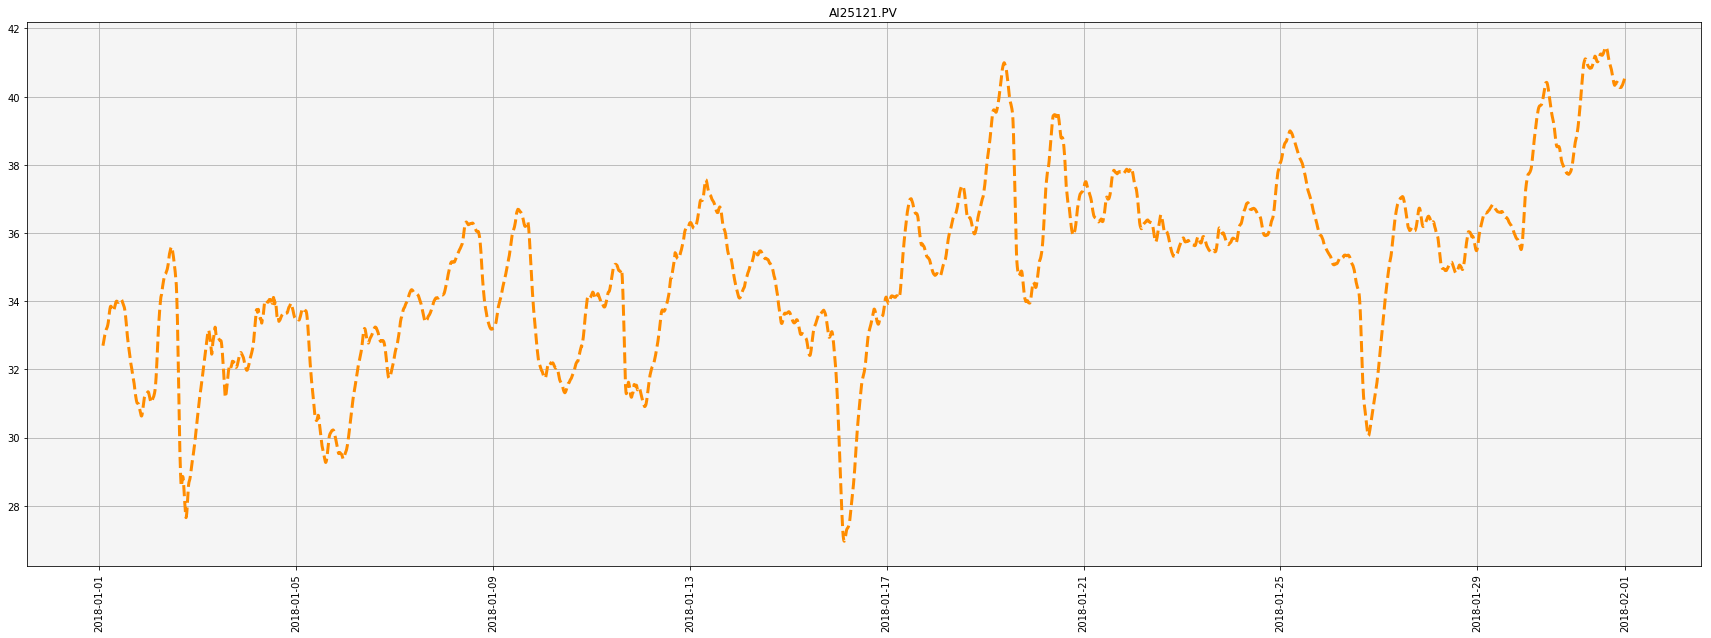

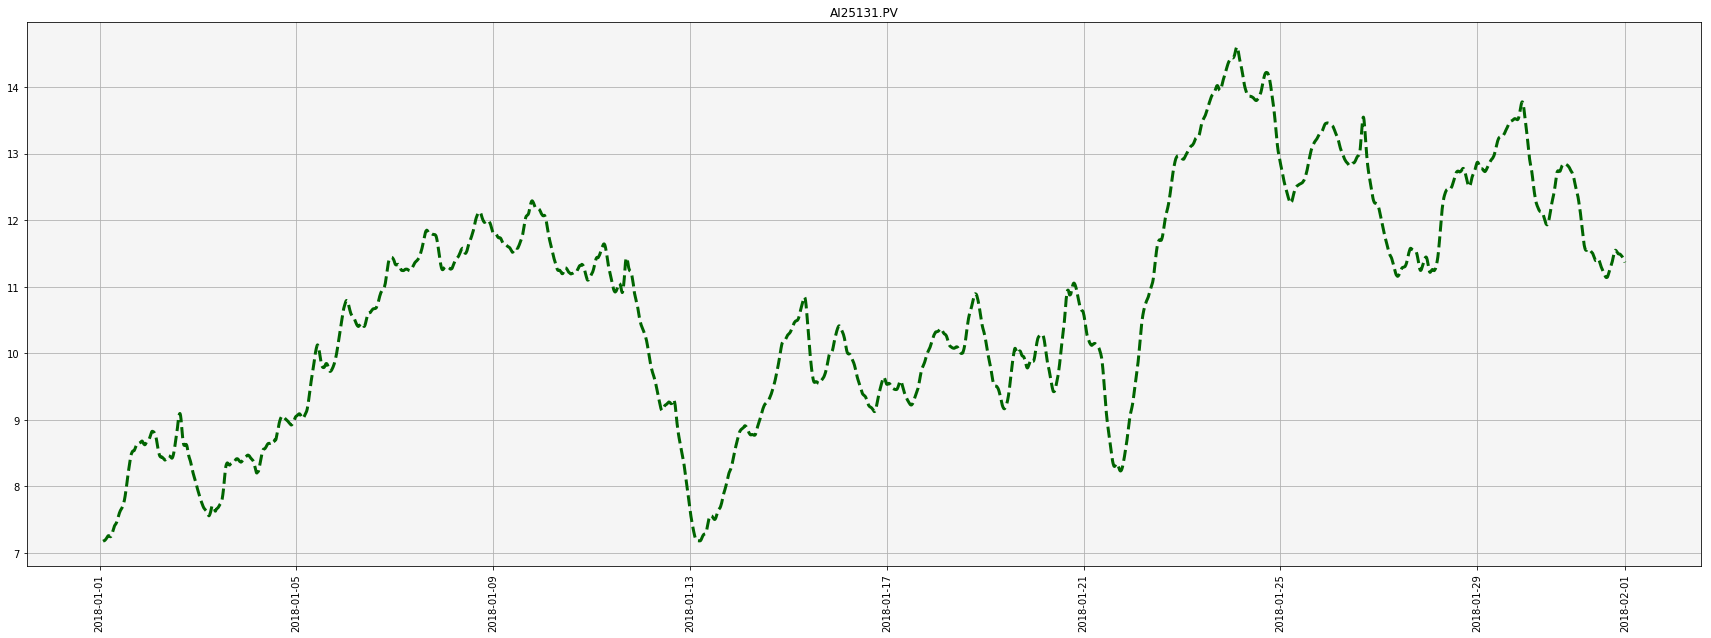

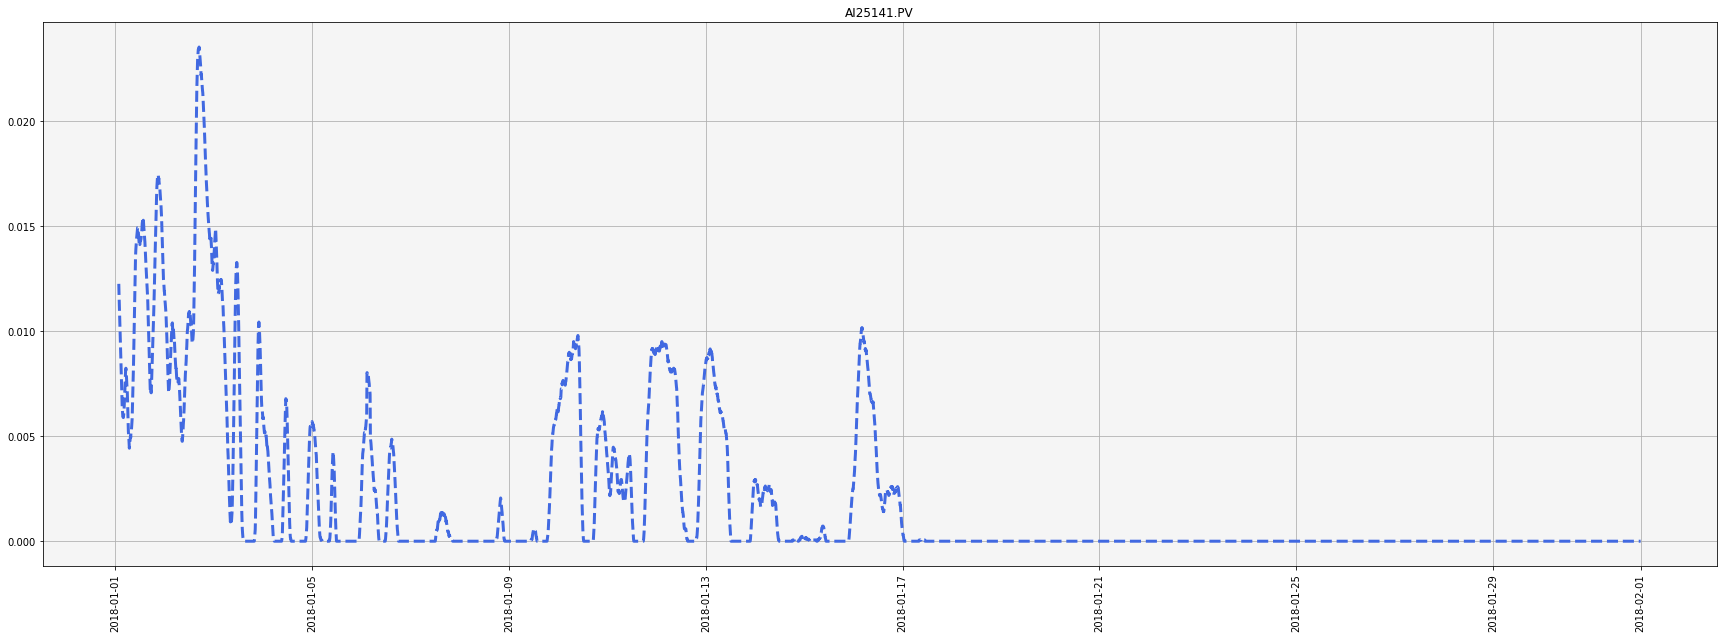

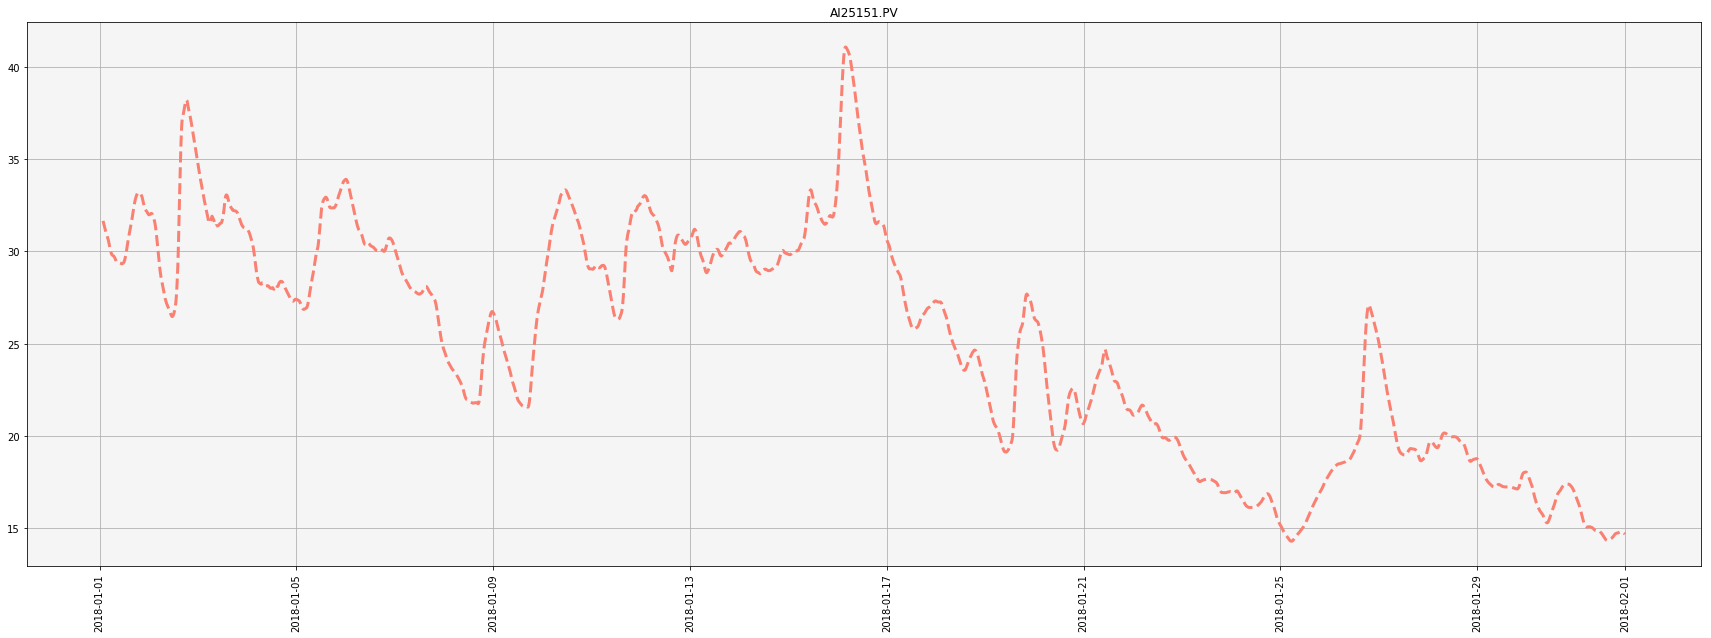

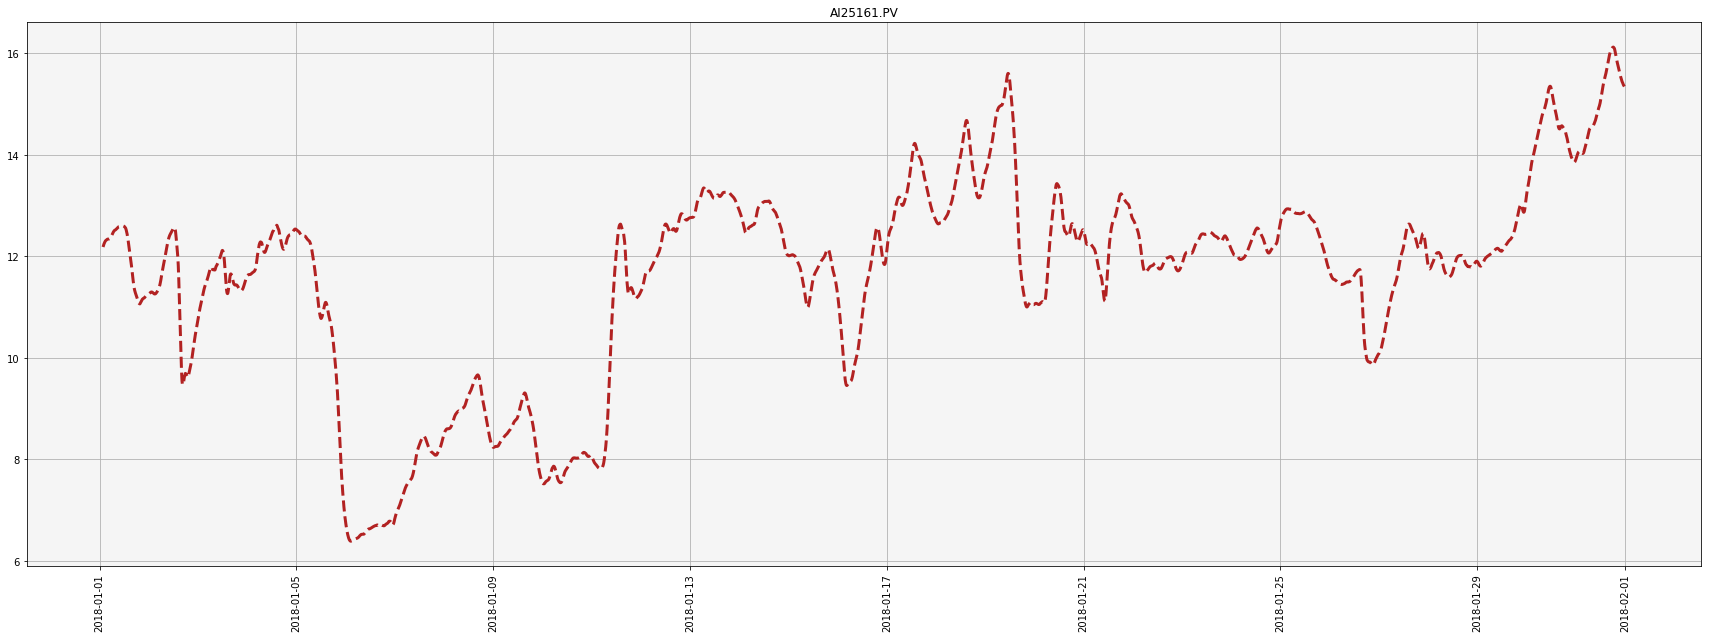

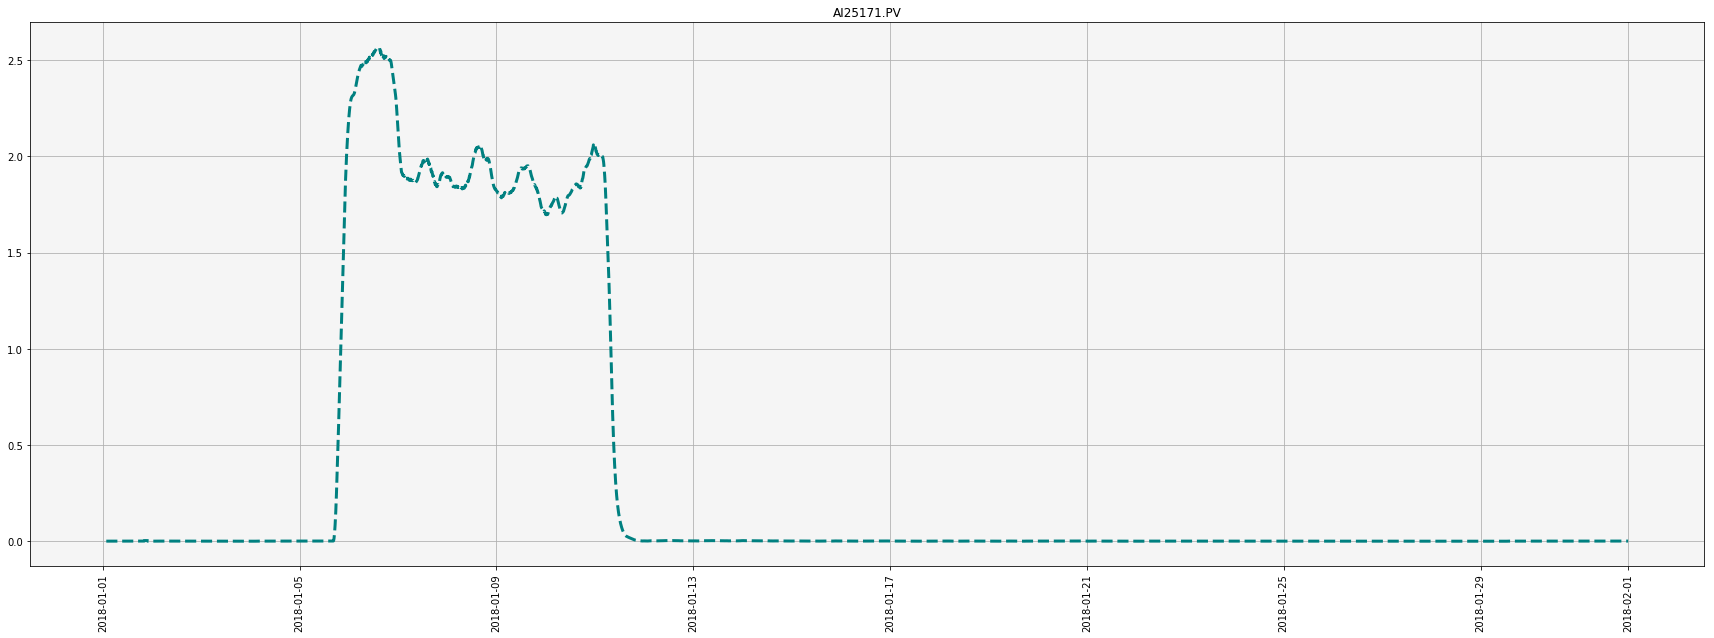

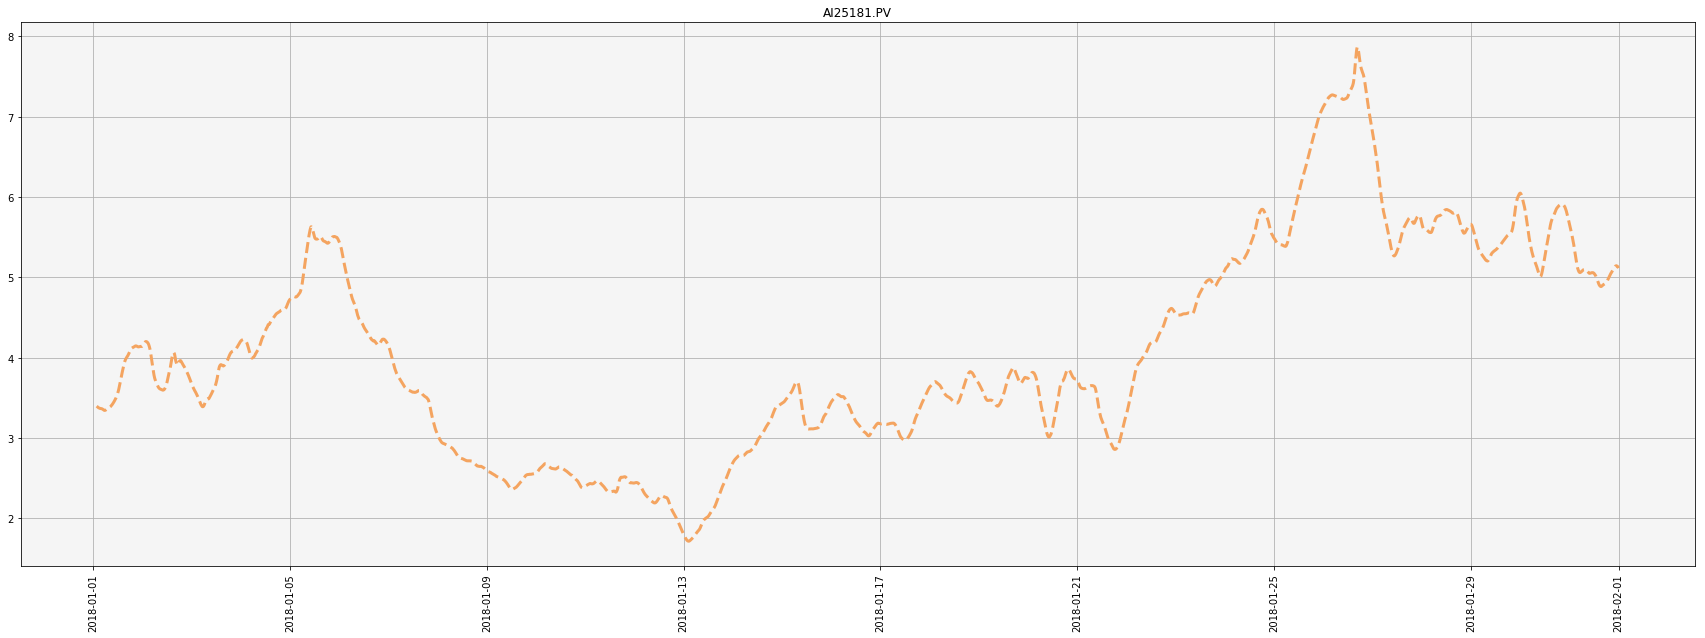

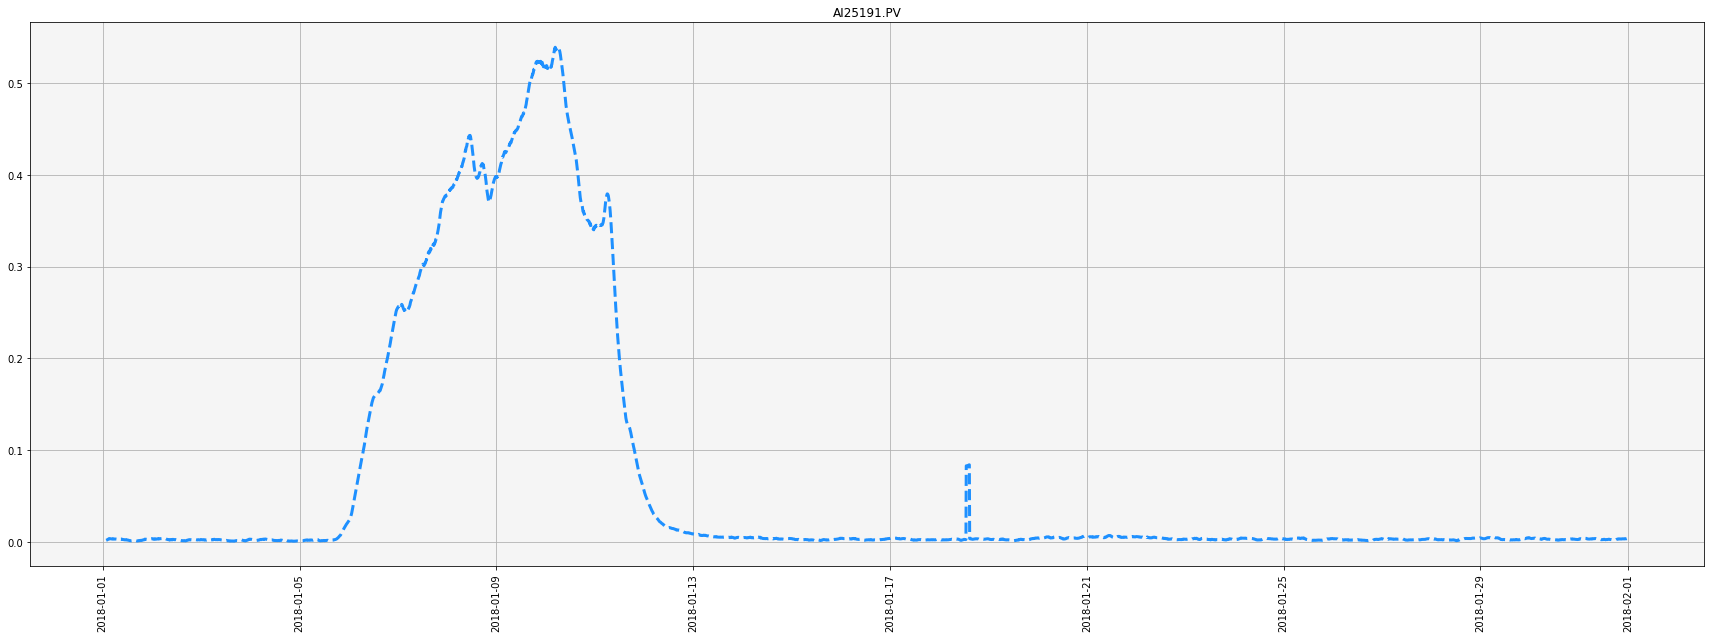

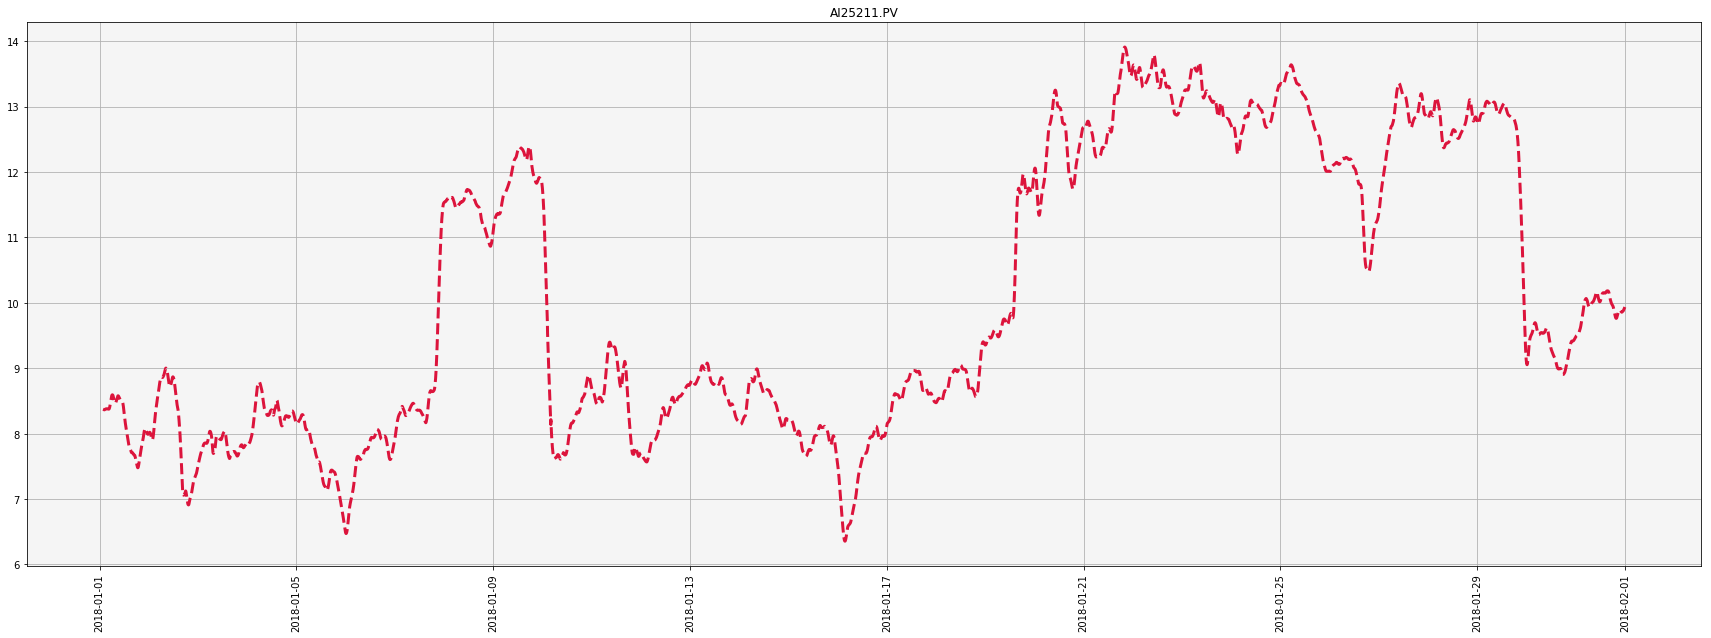

In [6]:
#Escolha das Datas de Iníco e Fim e da quantidade de pontos para a média móvel

inicio_data = '2018-01-01 00:00:00'
fim_data = '2018-02-01 00:00:00'
qtd_pontos = 100

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

dfw_filtered = df[tags_gas['302A']][(df.index > start_date) & (df.index < end_date) ].rolling(window = qtd_pontos).mean();

colors = ['darkorange', 'darkgreen', 'royalblue', 'salmon', 'firebrick','teal','sandybrown',
          'dodgerblue', 'crimson', 'darkolivegreen', 'skyblue', 'mediumpurple','indianred', 
          'darkcyan', 'chocolate', 'cornflowerblue', 'tan', 'darkblue', 'gold', 'darkgray']

#Plotagem da Entrada
for i in range(len(tags_gas['302A'])):
    fig , ax = plt.subplots(figsize = [30, 10]);
    ax.set_facecolor(color = 'whitesmoke')
    ax.set_title(tags_gas['302A'][i])
    ax.plot(dfw_filtered[tags_gas['302A'][i]], color = colors[i], lw = 3, linestyle = '--')
    ax.xaxis.set_tick_params(rotation = 90)
    ax.grid(True)
    name = tags_gas['302A'][i]
    #plt.savefig(name+'.png', dpi = 300)
    plt.show()


### 3. Visualizações Estatísticas

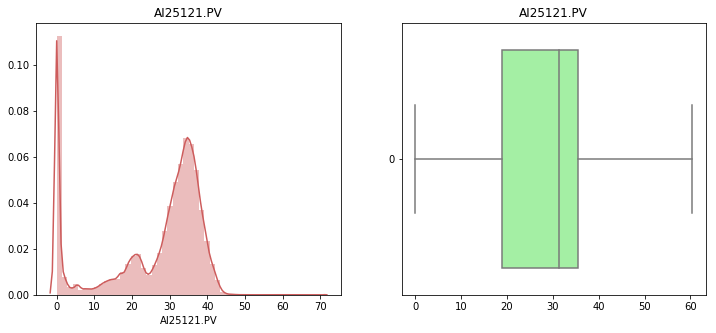

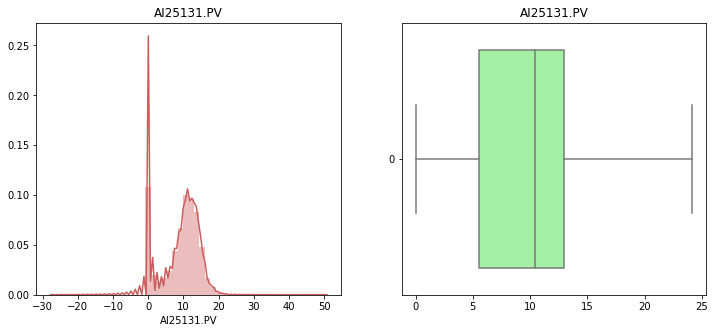

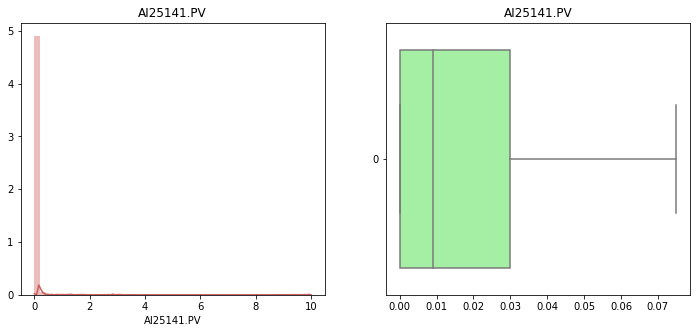

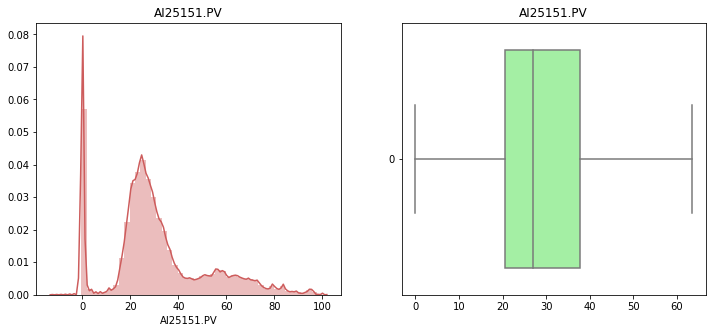

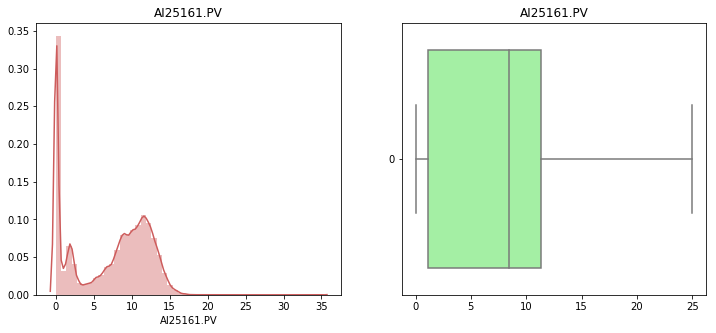

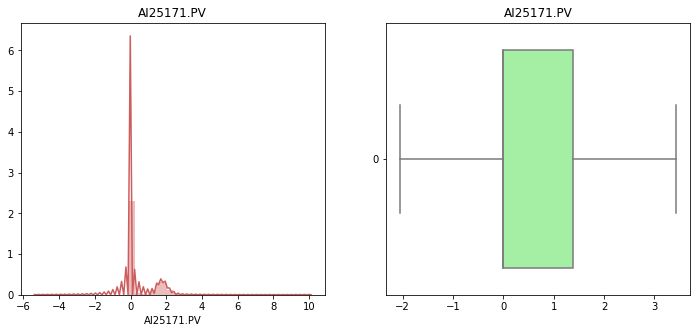

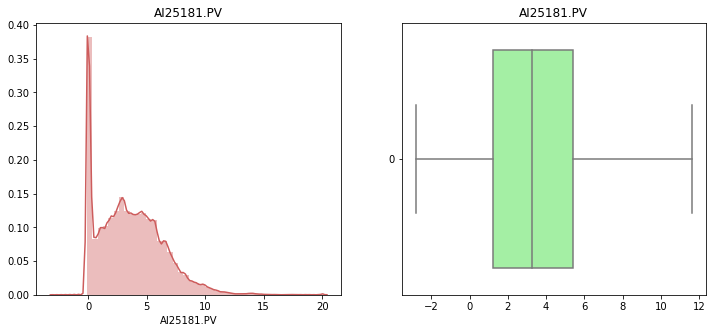

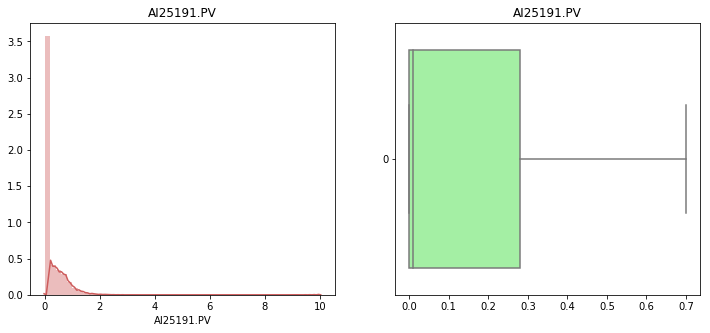

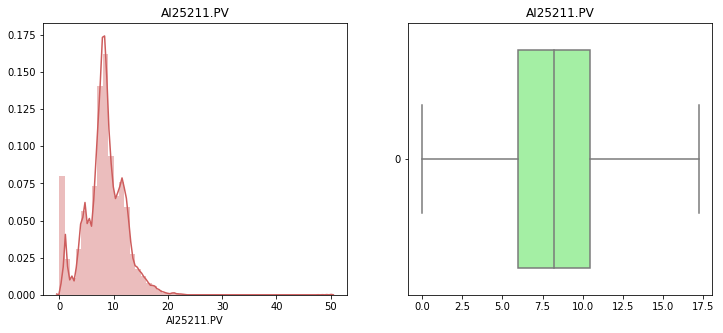

In [7]:
df_plot = df.dropna(axis = 1, how = 'all')

for i in range(len(tags_gas['302A'])):
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(tags_gas['302A'][i])
    axes[1].set_title(tags_gas['302A'][i])
    sns.distplot(df_plot[tags_gas['302A'][i]].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_plot[tags_gas['302A'][i]].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

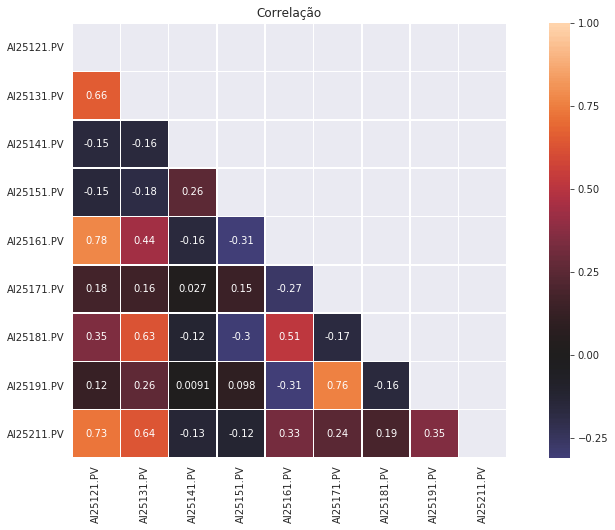

In [8]:
inicio_data = '2018-01-01 00:00:00'
fim_data = '2019-01-01 00:00:00'

#predict_1 = 'TI3409_1.PV'
#df[predict_1] = df['TI3409.PV'].shift(1000)
#df_plot = df.dropna(axis = 1, how = 'all')

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

#tags_temp['302A'].append(predict_1)

corr = df_plot[tags_gas['302A']][(df_plot.index >= start_date) & (df_plot.index <= end_date)].dropna().corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style('dark'):
    plt.figure(figsize = [15, 8])
    plt.title('Correlação')
    sns.heatmap(corr, mask = mask, center = 0, annot = True, square = True, linewidths = .5)
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 0) 

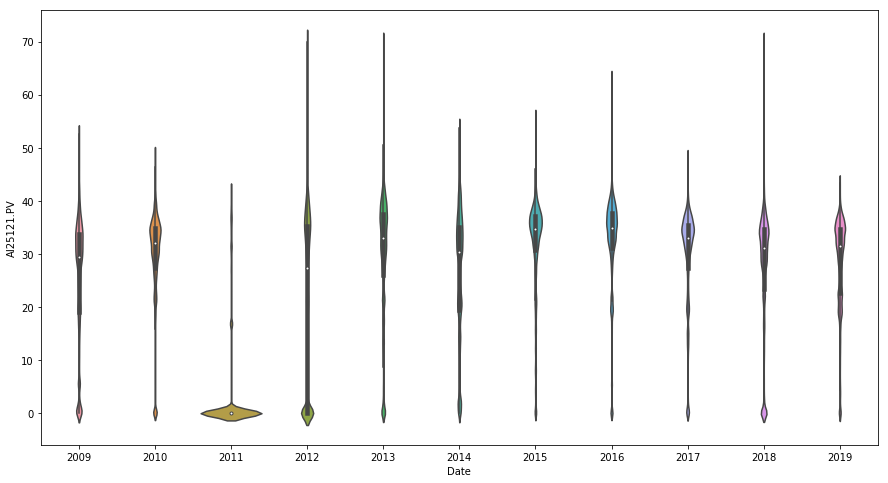

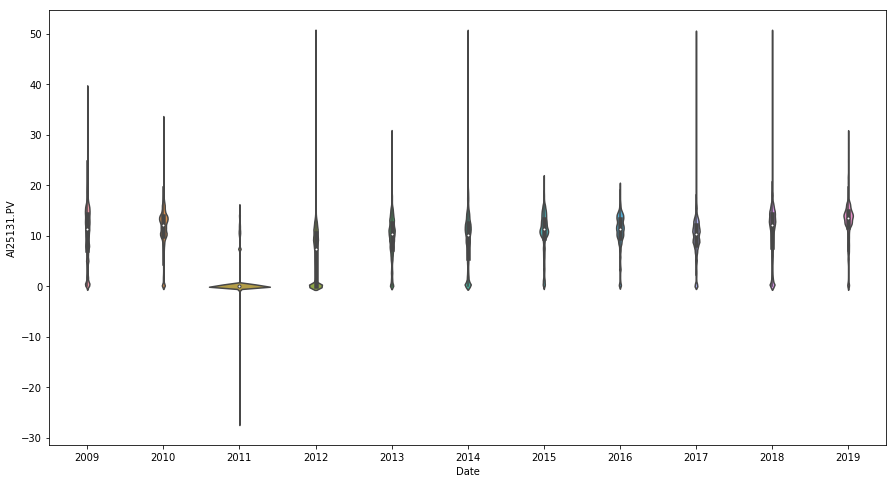

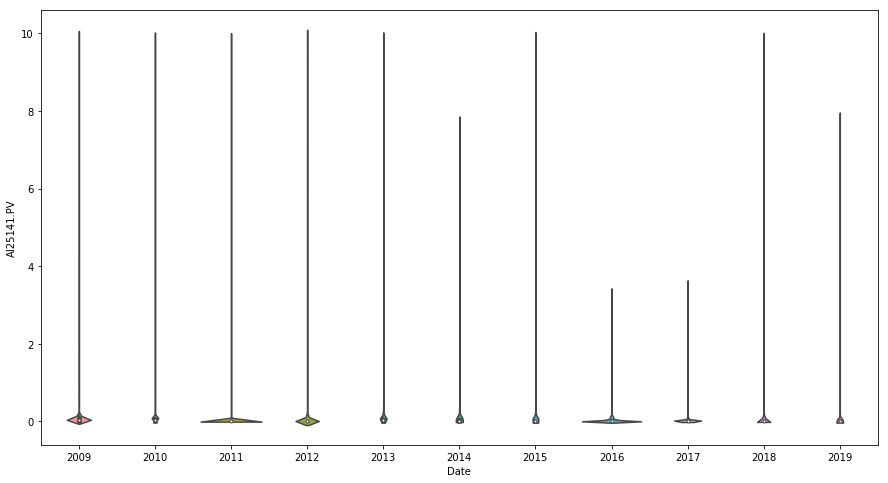

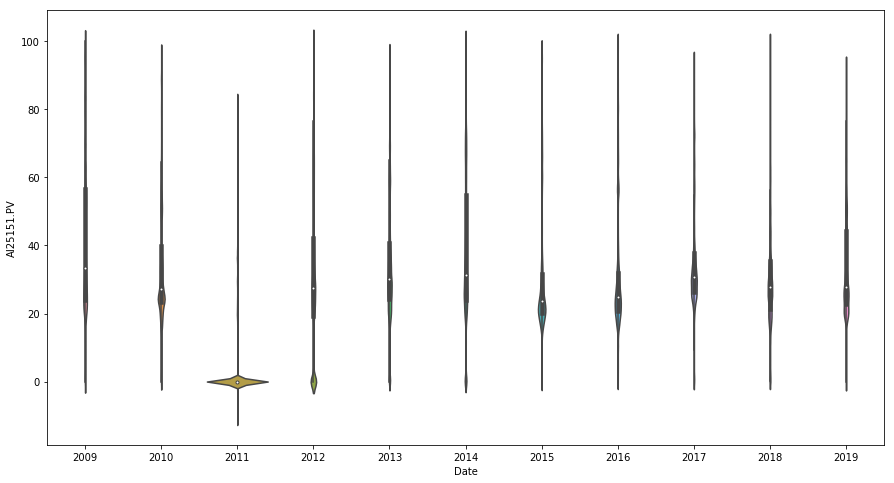

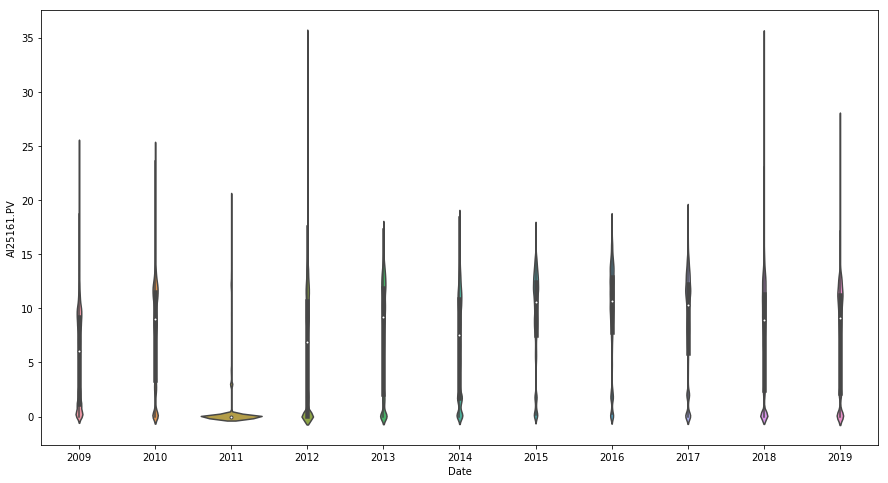

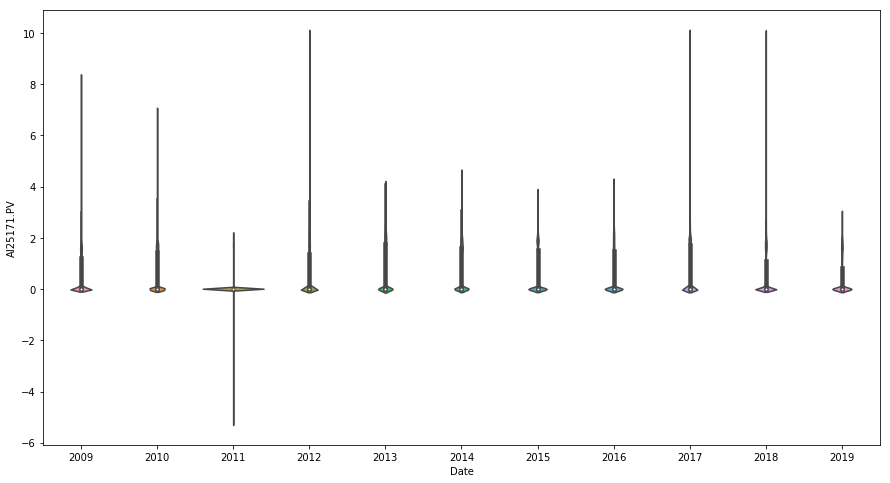

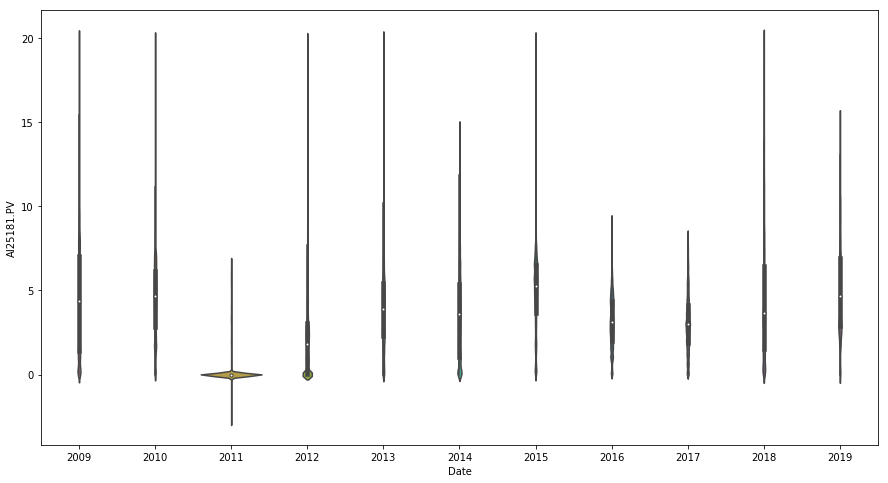

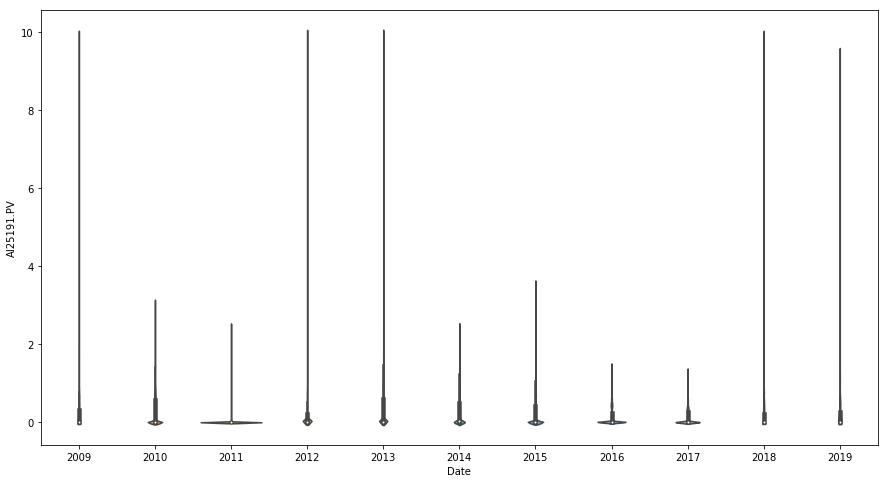

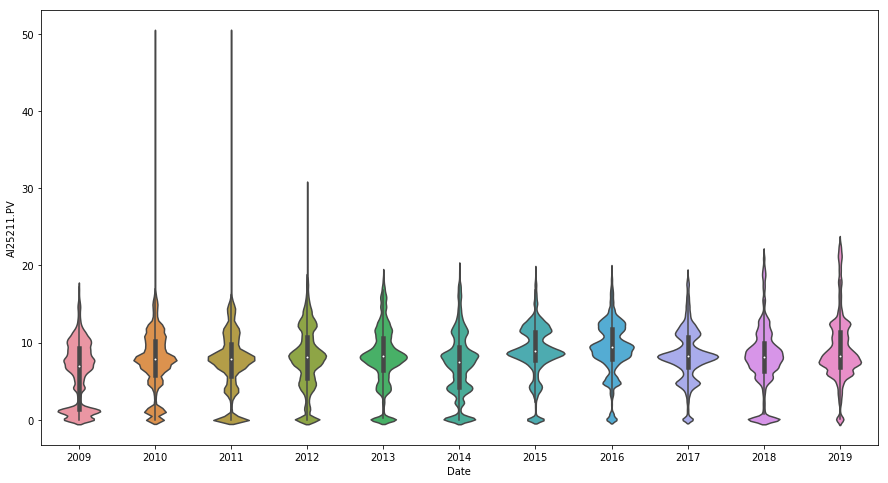

In [9]:
for i in tags_gas['302A']:
    plt.figure(figsize = (15, 8))
    sns.violinplot(x = df.index.year, y = i, data = df)
    name = i+' ao longo dos anos'
    #plt.savefig('./figuras/'+name+'.png', dpi = 300)
    plt.show()

###  Seleção dos Dados:
######  0 $\leq$ AI25121.PV $\leq$ 60
######  0 $\leq$ AI25131.PV $\leq$ 25
######  0 $\leq$ AI25141.PV $\leq$ 0.07
######  0 $\leq$ AI25151.PV $\leq$ 60
######  0 $\leq$ AI25161.PV $\leq$ 25
######  0 $\leq$ AI25171.PV $\leq$ 3
######  0 $\leq$ AI25181.PV $\leq$ 12
######  0 $\leq$ AI25191.PV $\leq$ 0.7
######  0 $\leq$ AI25211.PV $\leq$ 17.5

In [10]:
df_use = df[tags_gas['302A']].copy()
df_use = df_use[(df_use['AI25121.PV'] >=  0) & (df_use['AI25121.PV'] <=  60)]
df_use = df_use[(df_use['AI25131.PV'] >=  0) & (df_use['AI25131.PV'] <=  25)]
df_use = df_use[(df_use['AI25141.PV'] >=  0) & (df_use['AI25141.PV'] <=  0.07)]
df_use = df_use[(df_use['AI25151.PV'] >=  0) & (df_use['AI25151.PV'] <=  60)]
df_use = df_use[(df_use['AI25161.PV'] >=  0) & (df_use['AI25161.PV'] <=  25)]
df_use = df_use[(df_use['AI25171.PV'] >=  0) & (df_use['AI25171.PV'] <=  3)]
df_use = df_use[(df_use['AI25181.PV'] >=  0) & (df_use['AI25181.PV'] <=  12)]
df_use = df_use[(df_use['AI25191.PV'] >=  0) & (df_use['AI25191.PV'] <=  0.7)]
df_use = df_use[(df_use['AI25211.PV'] >=  0) & (df_use['AI25211.PV'] <=  17.5)]

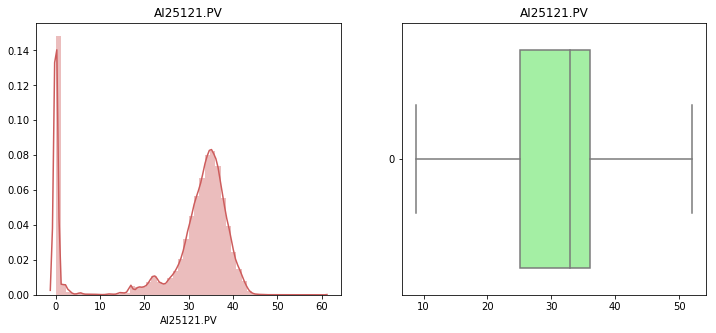

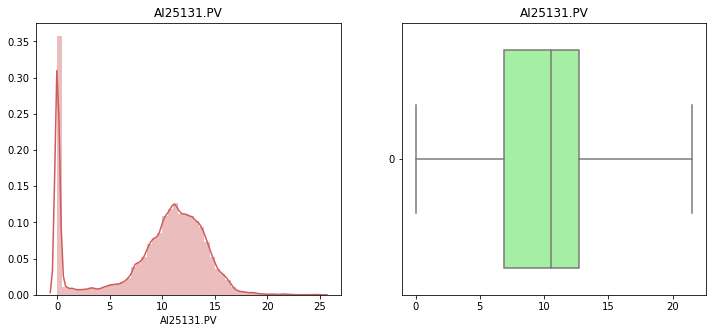

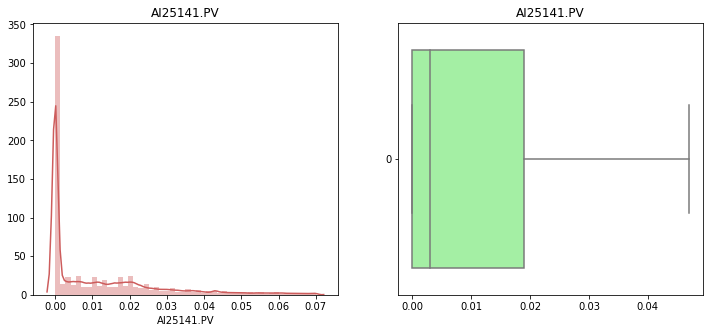

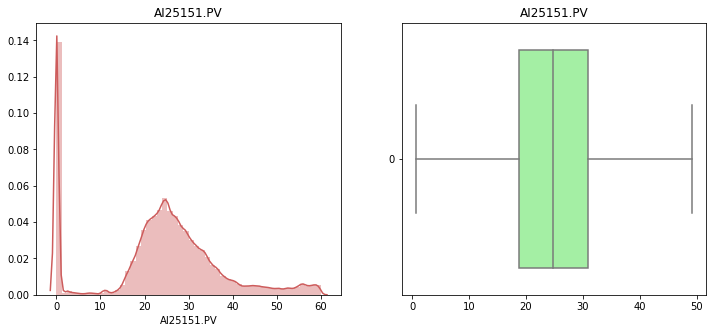

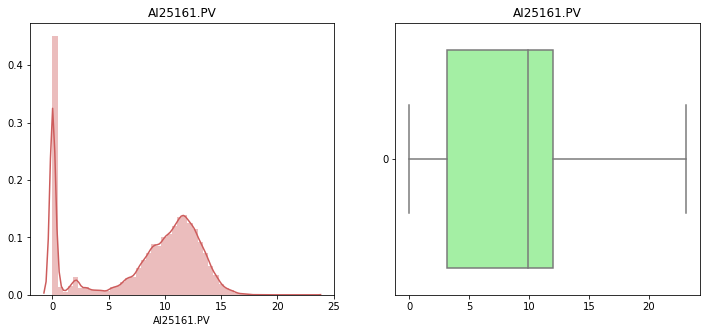

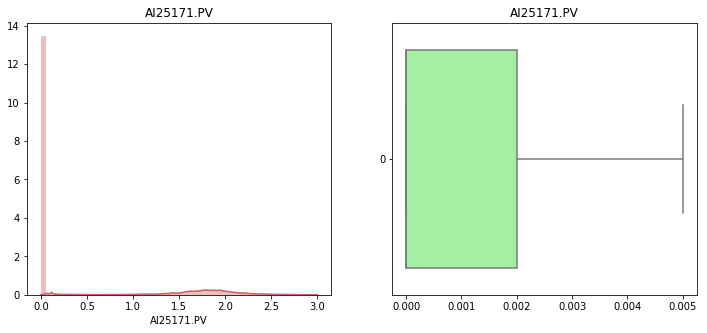

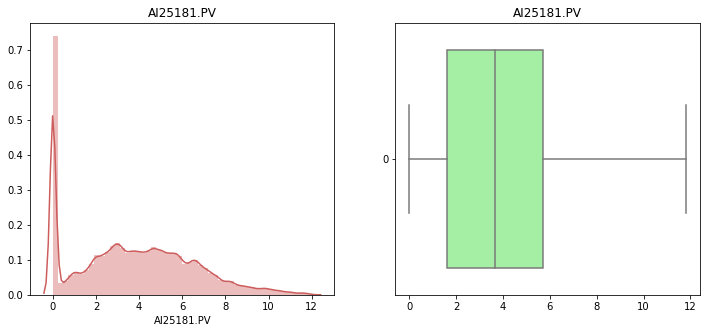

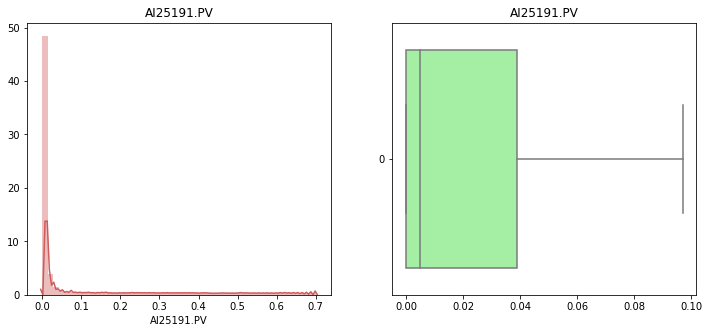

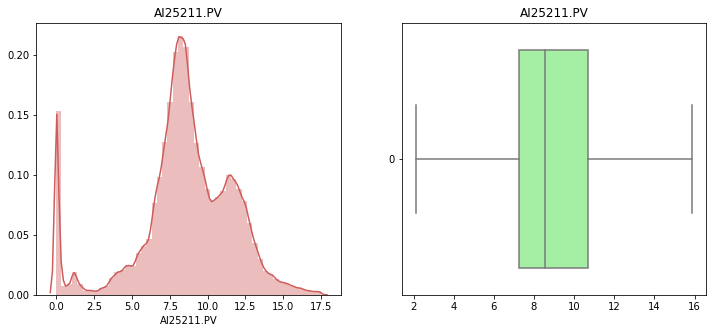

In [11]:
for i in df_use.columns:
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(i)
    axes[1].set_title(i)
    sns.distplot(df_use[i].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_use[i].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

In [12]:
df_use.to_csv(output_path+'df_gas_filtrada.csv.gz', compression = 'gzip')

In [13]:
hora = True    # se quiser analisar de hora em hora em vez de minuto a minuto
if hora:
    df_use = df_use.resample('H').mean()